# First steps
Before starting to use classes and methods defined in [phaseportrait](phaseportrait), we must import it:

In [20]:
from phaseportrait import *
import numpy as np # We are also going to use it, for an example involving trigonometric functions

Once this is done, we can start using classes and methods from the module. Let's see some examples, studying systems that appear on Strogatz's book.

## Example 1: Phase portrait of an harmonic oscillator (Example 5.1.1)

First step is making a function that gives us the system's evolution along time. In our case, the system yields following equations:

$$
    \dot{x} = v \\
    \dot{v} = -\omega^2 x
$$


We have to write up a function that takes parameters $(x,v)$ and returns their derivatives, $(\dot{x},\dot{v})$.

In [22]:
ω = 1.00

def dFOscillator(x, y):
    return y, -ω*ω*x

We could also set $\omega$ as a parameter, defining it the following way:

In [5]:
def dFOscillator(x, y, *, ω=1):
    return y, -ω*ω*x

We'll get the same results using the former or the latter.

Now that dF function is defined, we can initialize a *PhasePortrait2D* object.

*PhasePortrait2D* takes 2 args:
* dF function
* Range, which can be given as:
    1. A single number. In this case the range is defined from zero to the given number in both axes.
    2. A range, such `[lowerLimit , upperLimit]`. Both axes will take the same limits.
    3. Two ranges, such that `[[xAxisLowerLimit , xAxisUpperLimit], [yAxisLowerLimit , yAxisUpperLimit]]`


Once we initialize *PhasePortrait2D* object, we can use *plot()* method to obtain the phase portrait.

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Phase Portrait'}, xlabel='X', ylabel='$\\dot{X}$'>)

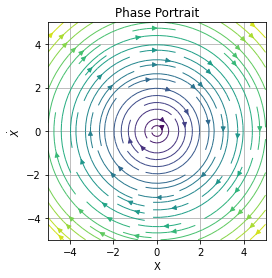

In [6]:
Oscillator = PhasePortrait2D(dFOscillator, [-5,5])
Oscillator.plot()

Color shows the speed of the trajectory. Purple shifted colors show less velocity than red shifted colors. Color scheme can be changed introducing kwarg *color* when calling *plot* method. A list with accepted values can be found [here](https://matplotlib.org/stable/gallery/color/colormap_reference.html).

Let's see some more examples, using more features.

## Example 2: Phase portrait of a system given in polar coordinates (Example 7.1.1)

First step is defining dF function, which outputs $r$ and $\theta$ derivatives.

In [7]:
def dFPolar(r, θ):
    return 0.5*r*(1 - r*r), 1+0*θ

We can select polar coordinates input giving *Polar=True* keywarg when calling *PhasePortrait2D*. Plot's title can also be passed as *Title* kwarg.

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Limit cycle'}, xlabel='X', ylabel='$\\dot{X}$'>)

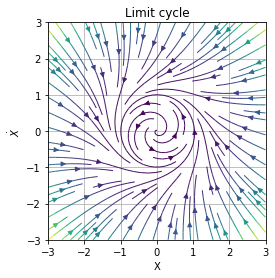

In [8]:
PolarCoordinates = PhasePortrait2D(dFPolar, [-3, 3], Polar=True, Title='Limit cycle')
PolarCoordinates.plot()

We could also wonder how would the phase portrait evolve as dF function parameters change. For example, we could set the following dF function:

In [9]:
def dFPolar(r, θ, *, μ=0.5,η=0):
    return μ*r*(1 - r*r), 1+η*θ

We could make several plots changing the value of η parameter, but it will not be very *dynamic*.

The best option is to add a slider which can be done using *add_slider* method. It takes the following entries:

** *args : **

* param_name : string type. It takes the name of the parameter on which the slider will be defined. Must be the same as the one appearing as kwarg in the dF function.

** \*\*kwargs : **

* valinit: initial value of *param_name* variable. Default value is 0.5 .

* valstep : slider's step value. Default value is 0.1 .

* valinterval : slider's range. Default value is `[-10, 10]`


Once we know this, we can add a slider to our *PolarCoordinates* plot.

In [10]:
PolarCoordinates = PhasePortrait2D(dFPolar, [-3, 3], Polar=True, Title='Limit cycle')
PolarCoordinates.add_slider('μ', valinit=0.5)
PolarCoordinates.add_slider('η', valinit=0)
PolarCoordinates.plot()

Sliders can be dragged to change parameters value, and the new phase portrait will appear. 

Unfortunately, Jupyter Notebooks do not support interactive plots (at least, not the ones that are done this way). We've prepared another file showing some examples with sliders, that can be seen at [sliderExamples.py](sliderExamples.py)

## Example 3: Love Affairs
Based on the Love Affairs problems, a dF function can be made to study several cases that are proposed.

Let's initialize parameters as done in exercise 5.3.2.

We can also pass *PhasePortrait2D* some new kwargs, such as *xlabel* and *ylabel*, both will change plot's labels. *Density* kwarg is also passed, this controls *closeness* of nearby trajectories.

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Love Affairs'}, xlabel='R', ylabel='J'>)

Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.8/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/usr/lib/python3.8/tkinter/__init__.py", line 814, in callit
    func(*args)
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x7f7308cd9730>
Exception in Tkinter callback
Traceba

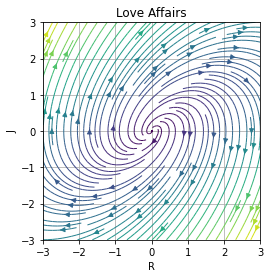

In [11]:
def dFLoveAffairs(R, J, *, a=1, b=0, c=-1, d=1):
    return a*J + b*R, c*R + d*J

LoveAffairsPortrait = PhasePortrait2D(dFLoveAffairs, [-3, 3], Density=1.5, Title='Love Affairs', xlabel='R', ylabel='J')
LoveAffairsPortrait.plot()

Once more, we encourage you to check [sliderExamples.py](sliderExamples.py) to see some sliders in action.

With this last example, we've seen all args and kwargs from *PhasePortrait2D* class, so you can now go and make your own 2D plots.

We include some more examples, with no extra explanation, just to show some cool results that can be achieved.

## Example 4: Rabbits vs Sheep

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Rabbits vs Sheep'}, xlabel='Rabbits', ylabel='Sheep'>)

Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.8/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/usr/lib/python3.8/tkinter/__init__.py", line 814, in callit
    func(*args)
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x7f7303830250>
Exception in Tkinter callback
Traceba

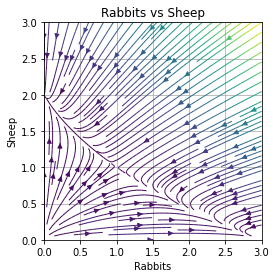

In [12]:
def dFRabbitsVsSheep(x, y):
    return x*(3-x-2*y), y*(2-x-y)

RabbitsVsSheep = PhasePortrait2D(dFRabbitsVsSheep, 3, Density=1.5, Title='Rabbits vs Sheep', xlabel='Rabbits', ylabel='Sheep')
RabbitsVsSheep.plot()

## Example 5: Non-linear center

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Non-linear center at (0,0)'}, xlabel='X', ylabel='Y'>)

Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.8/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/usr/lib/python3.8/tkinter/__init__.py", line 814, in callit
    func(*args)
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x7f7303567f70>
Exception in Tkinter callback
Traceba

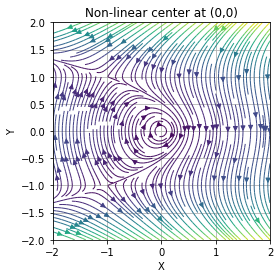

In [13]:
def dFNonLinearCenter(x, y):
    return y-y**3, -x-y**2

NonLinearCenterPortrait = PhasePortrait2D(dFNonLinearCenter, [-2,2], Density=2, Title='Non-linear center at (0,0)', xlabel='X', ylabel='Y')
NonLinearCenterPortrait.plot()

## Exercise 6: Van der Pol oscillator (Exercise 6.1.8)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Van der Pol oscillator'}, xlabel='X', ylabel='Y'>)

Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.8/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/usr/lib/python3.8/tkinter/__init__.py", line 814, in callit
    func(*args)
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x7f73032a1580>
Exception in Tkinter callback
Traceba

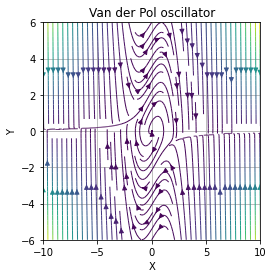

In [14]:
def dFVanDerPol(x, y):
    return y, -x + y*(1-x**2)

VanDerPolPortrait = PhasePortrait2D(dFVanDerPol, [[-10, 10], [-6, 6]], Density=1.5, Title='Van der Pol oscillator', xlabel='X', ylabel='Y')
VanDerPolPortrait.plot()

## Example 7: Dipole (Exercise 6.1.9)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Dipole'}, xlabel='X', ylabel='Y'>)

Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.8/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/usr/lib/python3.8/tkinter/__init__.py", line 814, in callit
    func(*args)
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x7f7303830280>
Exception in Tkinter callback
Traceba

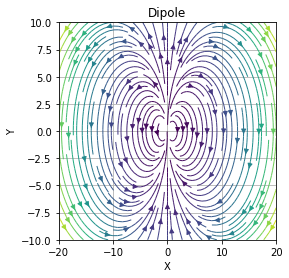

In [15]:
def dFDipole(x, y):
    return 2*x*y, y*y-x*x

DipoloPortrait = PhasePortrait2D(dFDipole, [[-20, 20], [-10, 10]], Density=1.5, Title='Dipole', xlabel='X', ylabel='Y')
DipoloPortrait.plot()

## Example 8: "Two-eyed *Monster*" (Exercise 6.1.10)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Monster'}, xlabel='X', ylabel='Y'>)

Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.8/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/usr/lib/python3.8/tkinter/__init__.py", line 814, in callit
    func(*args)
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x7f7303646130>
Exception in Tkinter callback
Traceba

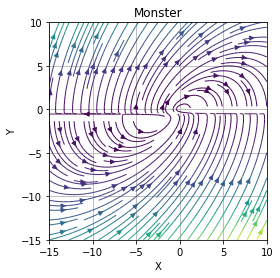

In [16]:
def dFMonster(x, y):
    return y + y*y, -0.5*x + 0.20*y - x*y + 1.20*y*y

MonsterPortrait = PhasePortrait2D(dFMonster, [-15, 10], Density=1.5, Title='Monster', xlabel='X', ylabel='Y')
MonsterPortrait.plot()

## Example 9: "*Parrot*" (Exercise 6.1.11)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Parrot'}, xlabel='X', ylabel='Y'>)

Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.8/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/usr/lib/python3.8/tkinter/__init__.py", line 814, in callit
    func(*args)
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x7f7302aaed00>
Exception in Tkinter callback
Traceba

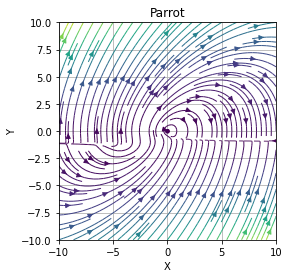

In [17]:
def dFParrot(x, y):
    return y + y*y, -x + 0.20*y - x*y + 1.20*y*y

RetratoParrot = PhasePortrait2D(dFParrot, [-10, 10], Density=1.5, Title='Parrot', xlabel='X', ylabel='Y')
RetratoParrot.plot()

## Example 10: *Wallpaper* (Exercise 6.6.3)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Wallpaper'}, xlabel='X', ylabel='Y'>)

Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.8/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/usr/lib/python3.8/tkinter/__init__.py", line 814, in callit
    func(*args)
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x7f73023a3550>
Exception in Tkinter callback
Traceba

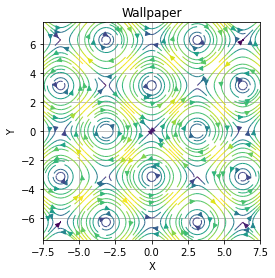

In [18]:
def dFWallpaper(x, y):
    return np.sin(y), np.sin(x)

Wallpaper = PhasePortrait2D(dFWallpaper, [-7.5, 7.5], Density=2, Title='Wallpaper', xlabel='X', ylabel='Y')
Wallpaper.plot()

## Example 11: Computer explorations #2 & #3

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Computer Explorations #3'}, xlabel='X', ylabel='$\\dot{X}$'>)

Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.8/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/usr/lib/python3.8/tkinter/__init__.py", line 814, in callit
    func(*args)
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x7f73033a5040>
Exception in Tkinter callback
Traceba

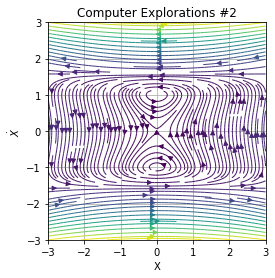

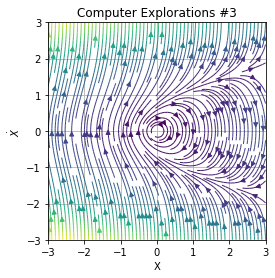

In [19]:
def dFCompEx2(x, y):
    return y - y**3, x*np.cos(y)


def dFCompEx3(x, y):
    return np.sin(y), y**2 - x


CompEx2 = PhasePortrait2D(dFCompEx2, [-3, 3], Density=2, Title='Computer Explorations #2')
CompEx2.plot()


CompEx3 = PhasePortrait2D(dFCompEx3, [-3, 3], Density=2, Title='Computer Explorations #3')
CompEx3.plot()

## Example 12: Simple pendulum

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Simple pendulum'}, xlabel='$\\Theta$', ylabel='$\\dot{\\Theta}$'>)

Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.8/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/usr/lib/python3.8/tkinter/__init__.py", line 814, in callit
    func(*args)
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "/home/loracio/.local/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x7f7301b0dcd0>
Exception in Tkinter callback
Traceba

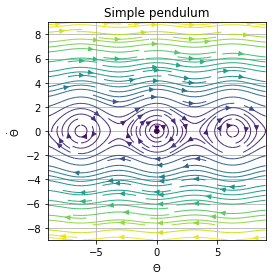

In [21]:
def dFPendulum(theta, v):
    return v, -np.sin(theta)

SimplePendulum = PhasePortrait2D(dFPendulum, [-9, 9], Density=1.5, Title='Simple pendulum', xlabel=r"$\Theta$", ylabel=r"$\dot{\Theta}$")
SimplePendulum.plot()

## Example 13: Damped simple pendulum

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Damped pendulum'}, xlabel='$\\Theta$', ylabel='$\\dot{\\Theta}$'>)

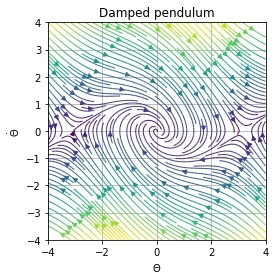

In [20]:
def dFDampedPendulum(theta, v):
    return v, -0.75*v-np.sin(theta)

DampedPendulum = PhasePortrait2D(dFDampedPendulum, [-4, 4], Density=2, Title='Damped pendulum', xlabel=r"$\Theta$", ylabel=r"$\dot{\Theta}$")
DampedPendulum.plot()

If you made it this far, thank you for your time! We hope you get this helpful.

-Unai Lería & Víctor Loras, April 2021